In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('survey_results_public.csv', index_col='ResponseId')
df_s = pd.read_csv('survey_results_schema.csv',index_col='qname')

In [3]:
pd.set_option('display.max_columns', 47)

In [5]:
df.drop(['US_State', 'UK_Country', 'Trans','Sexuality',  
         'SurveyLength', 'NEWStuck', 'NEWSOSites','SOVisitFreq','SOAccount', 'SOPartFreq', 'SOComm', 
         'SurveyEase' ,'CompFreq', 'Accessibility', 'NEWOtherComms',
        'LanguageWantToWorkWith','DatabaseWantToWorkWith', 'PlatformWantToWorkWith',  'WebframeWantToWorkWith',
        'MiscTechWantToWorkWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsWantToWorkWith'
        ],
        axis=1 , inplace=True)

In [6]:
flt_ksa = df['Country'] == 'Saudi Arabia'
df = df.loc[flt_ksa]

In [7]:
df = df.replace(np.nan, 0)
df = df.replace('Less than 1 year', 0.5)

In [28]:
df['YearsCode'] = df['YearsCode'].astype(int)

In [22]:
df = df [df.ConvertedCompYearly !=0]

In [23]:
df

,YearsCode,ConvertedCompYearly,LanguageHaveWorkedWith
ResponseId,,,
3645,4,22392.0,JavaScript;Kotlin;Python;TypeScript
5064,10,39996.0,Swift
5079,5,39348.0,C++;Python;SQL;Swift
7055,10,102384.0,Bash/Shell;C++;Dart;Elixir;Erlang;Java;JavaScr...
7059,0,2666.0,C#
7248,7,102384.0,Python;R;SQL
8769,18,95976.0,C#
13602,9,52260.0,C;HTML/CSS;JavaScript;Node.js;PHP
14421,20,59189.0,C#;HTML/CSS;Java;JavaScript;Python;SQL


In [24]:
df = df [['YearsCode', 'ConvertedCompYearly', 'LanguageHaveWorkedWith']]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 3645 to 79311
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearsCode               43 non-null     int32  
 1   ConvertedCompYearly     43 non-null     float64
 2   LanguageHaveWorkedWith  43 non-null     object 
dtypes: float64(1), int32(1), object(1)
memory usage: 1.2+ KB


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<AxesSubplot:xlabel='count', ylabel='lang'>

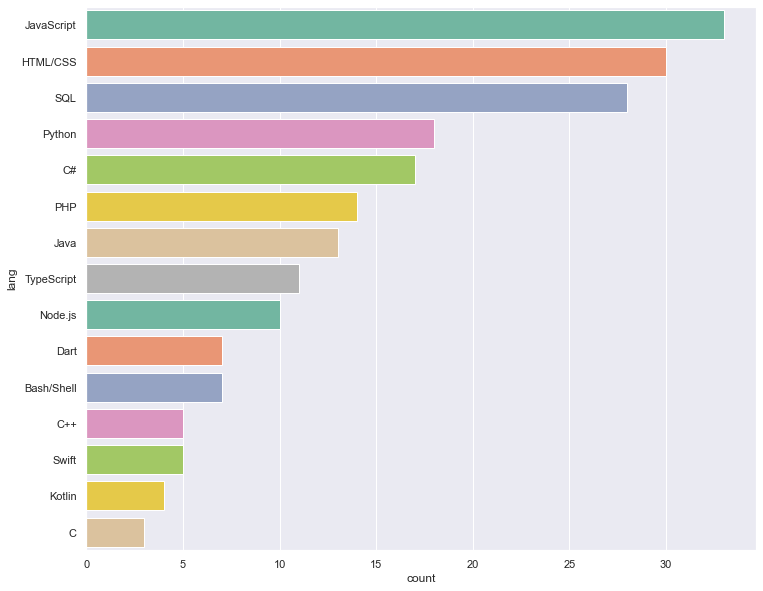

In [30]:
lang = df.assign(lang=df.LanguageHaveWorkedWith.str.split(";")).explode('lang')
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(y="lang", data=lang, palette="Set2", order=lang['lang'].value_counts().index[0:15])

In [31]:
df.corr()

,YearsCode,ConvertedCompYearly
YearsCode,1.000000,0.143232
ConvertedCompYearly,0.143232,1.000000
